In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('Paired')
%load_ext autoreload


%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
elections = pd.read_csv("./data/volby/volby_sociodemo.csv",sep=";")
elections.shape


(14271, 51)

In [32]:
elections['obec'] =  elections['obec'].astype(object)
elections['sl11zeny']  = elections['sl11obyvatel'] - elections['sl11muzi']


In [33]:
duplicate_rows = elections.duplicated().sum()
duplicate_districts = elections['obec_okrsek'].duplicated().sum()
print(f"Duplicated rows: {duplicate_rows}")
print(f"Duplicated districts: {duplicate_districts}")



Duplicated rows: 0
Duplicated districts: 0


In [34]:
elections =  elections.set_index(elections['obec_okrsek'])

In [35]:
def to_ratio(df, col, base):
    df[col+'_ratio'] = df[col]/df[base]

In [36]:
elections['par21other'] = elections['par21phcelkem']-elections[['par21spd',
       'par21spolu', 'par21pirsta', 'par21ano', 'par21soc', 'par21pri',
       'par21ksc', 'par21zel', 'par21tss']].sum(axis=1) 
elections['par17other'] = elections['par17phcelkem'] - elections[['par17ano', 'par17ods', 'par17top', 'par17kdu', 'par17spd',
       'par17soc', 'par17pir', 'par17sta', 'par17zel', 'par17ksc', 'par17svo']].sum(axis=1) 

,par17ano,par17ods,par17top,par17kdu,par17spd,par17soc,par17pir,par17sta,par17zel,par17ksc,par17svo,par17other
obec_okrsek,,,,,,,,,,,,
500011_1,128,43,13,46,70,38,50,50,5,25,4,16
500011_2,76,35,17,27,39,20,21,17,2,6,4,5
500011_3,60,35,8,37,35,26,27,21,1,9,8,8
500020_1,45,12,3,11,24,9,10,6,2,16,1,4
500020_2,150,37,15,18,66,33,25,19,4,19,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...
599948_4,162,44,9,38,53,33,43,17,3,43,3,20
599956_1,289,83,24,89,126,71,66,27,16,72,3,42
599964_1,165,33,7,67,55,30,23,17,2,75,5,11


In [37]:
for col in ['par21vsezn', 'par21spd',
       'par21spolu', 'par21pirsta', 'par21ano', 'par21soc', 'par21pri',
       'par21ksc', 'par21zel', 'par21tss','par21other']:
       to_ratio(elections, col, 'par21phcelkem')


for col in ['par17vsezn','par17ano', 'par17ods', 'par17top', 'par17kdu', 'par17spd',
       'par17soc', 'par17pir', 'par17sta', 'par17zel', 'par17ksc', 'par17svo','par17other']:
       to_ratio(elections, col, 'par17phcelkem')
for col in ['sl11muzi', 'sl11rozv', 'sl11deti', 'sl11seni',
       'sl11kat', 'sl11rom', 'sl11vs', 'sl11vos', 'sl11nast', 'sl11strm',
       'sl11strb', 'sl11zakl', 'sl11zam', 'sl11pod', 'sl11nezam',
       'sl11neprduch']:
       to_ratio(elections, col, 'sl11obyvatel')


In [38]:
elections['vel.obce_cat']  = pd.cut(elections['vel.obce'], [0,500,1000,5000,10000,20000,50000,100000, float("inf")])
translation = {
    '(0.0, 500.0]' : '500-',
    '(500.0, 1000.0]':'500-1k',
    '(1000.0, 5000.0]':'1-5k',
    '(5000.0, 10000.0]':'5-10k',
    '(10000.0, 20000.0]':'10-20k',
    '(20000.0, 50000.0]':'20-50k',
    '(50000.0, 100000.0]':'50-100k',
    '(100000.0, inf]':'100k+'
}

elections['vel.obce_cat'] = elections['vel.obce_cat'].astype(str).apply(lambda x: translation[x])

In [39]:
elections.to_csv("./data/volby/dataset_extended.csv",index=True,sep=";")

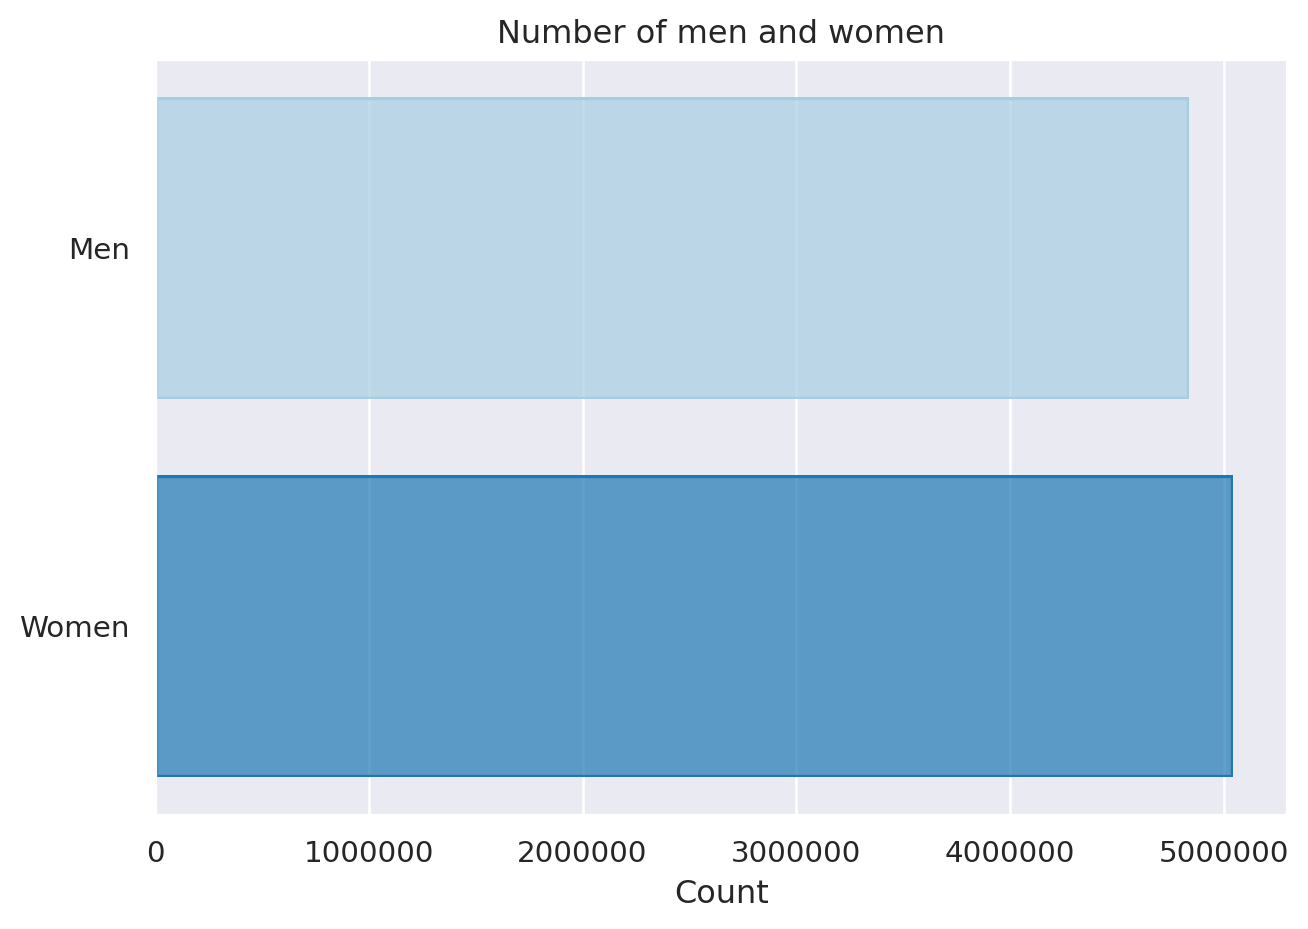

In [40]:
import scripts 
elections_extended = scripts.load_extended_dataset("./data/volby/dataset_extended.csv")
scripts.plot_gender_counts(elections_extended)


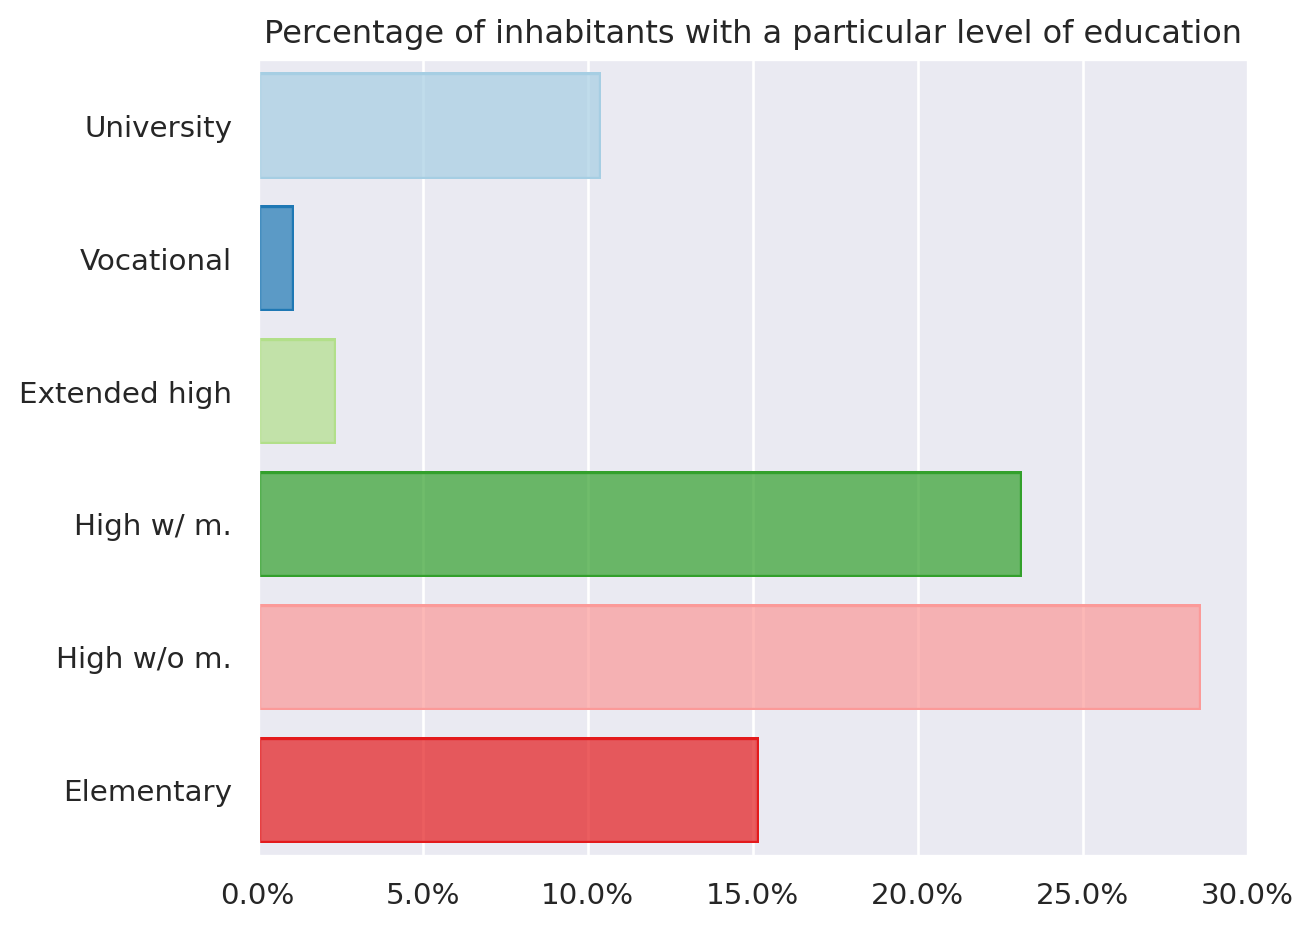

In [41]:
scripts.plot_edu_count(elections_extended)

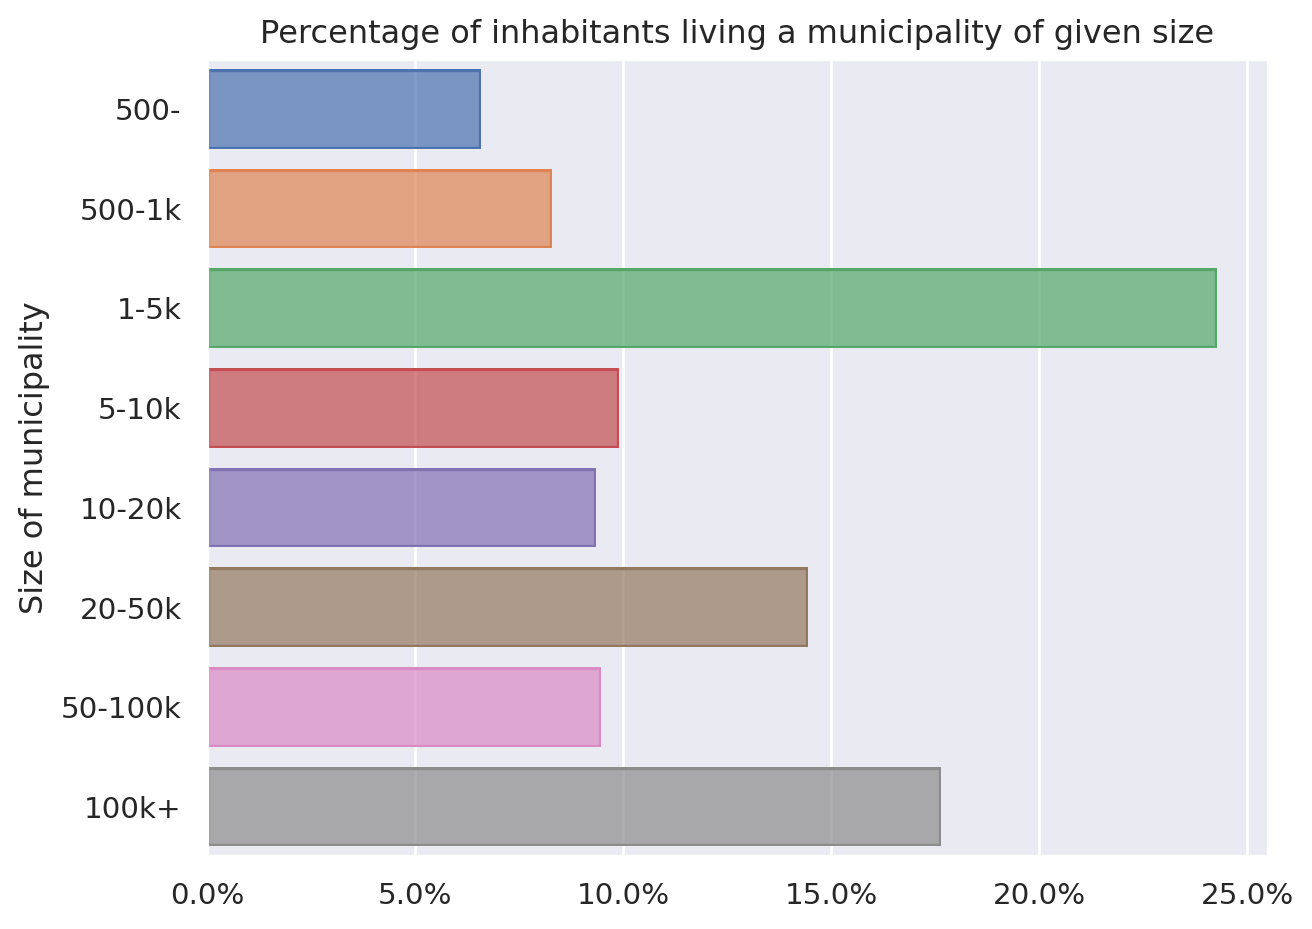

In [42]:
scripts.plot_municipality_size_ratio(elections_extended)

In [43]:
elections_extended.groupby("vel.obce_cat")["sl11obyvatel"].sum()

vel.obce_cat
1-5k       2399926
10-20k      923771
100k+      1744359
20-50k     1428168
5-10k       979599
50-100k     936796
500-        651911
500-1k      819641
Name: sl11obyvatel, dtype: int64

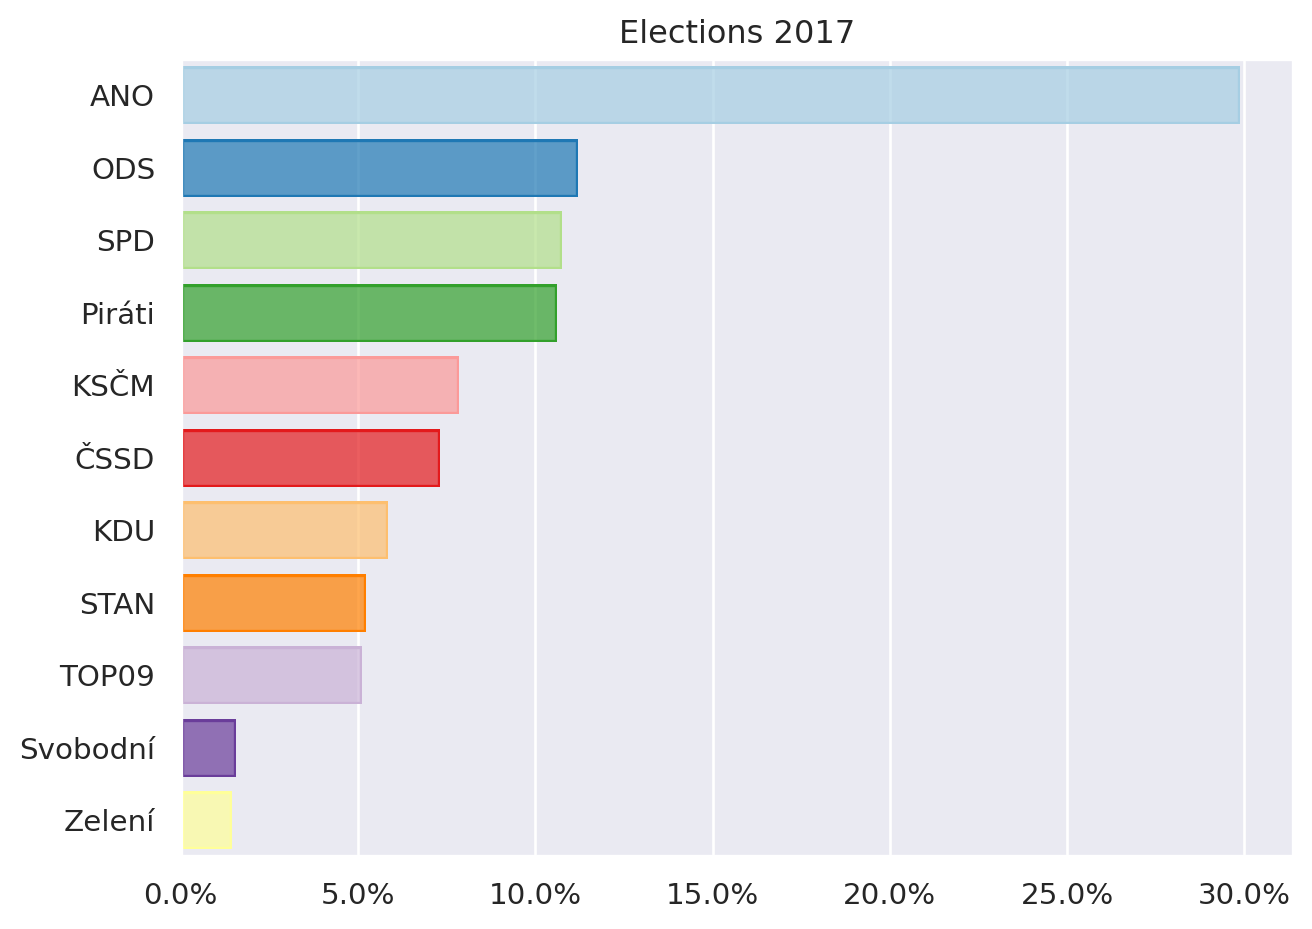

In [44]:

scripts.plot_elections_2017(elections_extended)


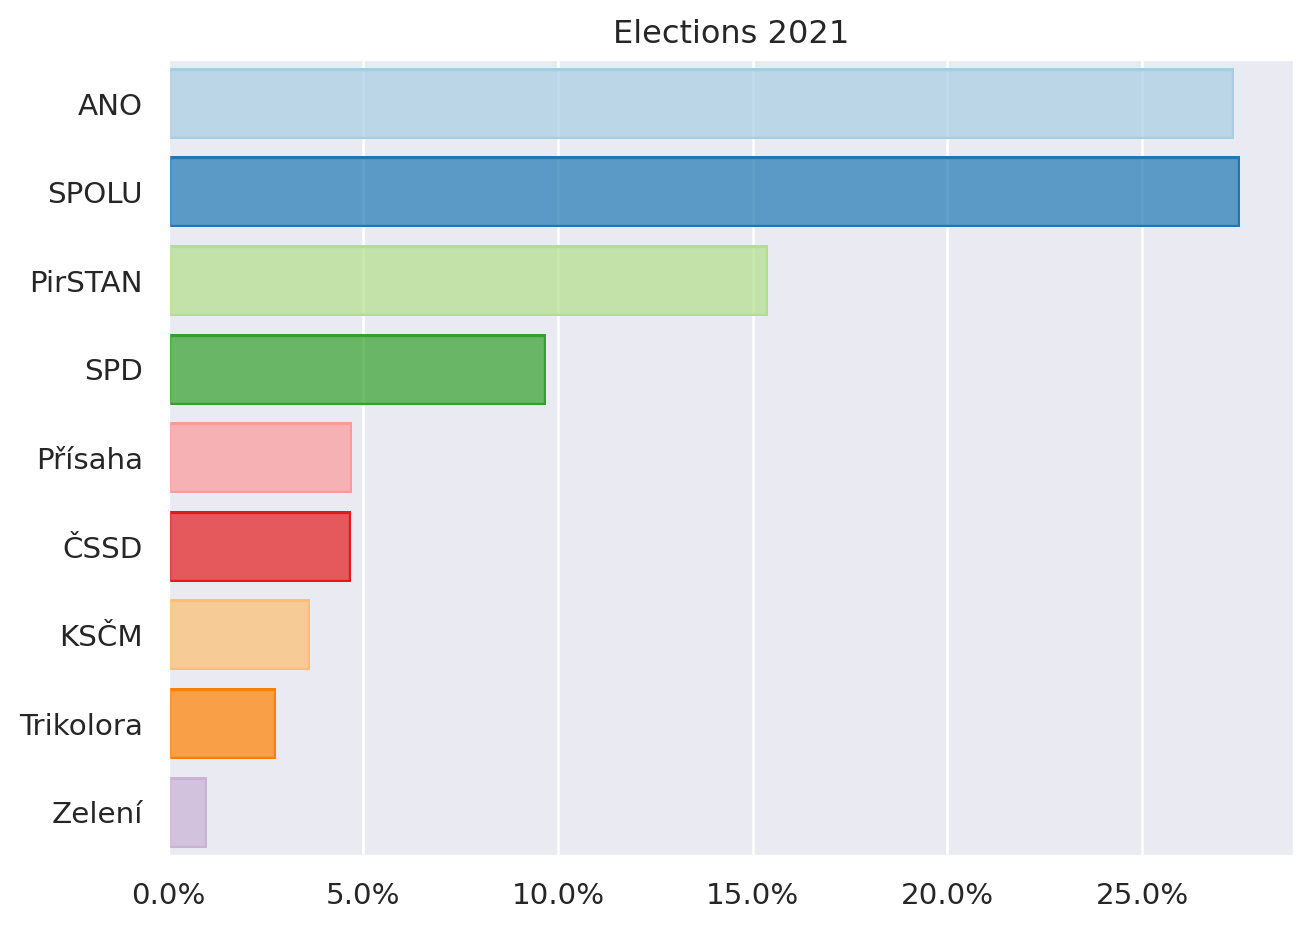

In [45]:
scripts.plot_elections_2021(elections_extended)


In [46]:
elections_extended['vel.obce_cat'].astype("category")


obec_okrsek
500011_1      1-5k
500011_2      1-5k
500011_3      1-5k
500020_1      1-5k
500020_2      1-5k
             ...  
599948_4      1-5k
599956_1      1-5k
599964_1    500-1k
599999_1      1-5k
599999_2      1-5k
Name: vel.obce_cat, Length: 14271, dtype: category
Categories (8, object): ['1-5k', '10-20k', '100k+', '20-50k', '5-10k', '50-100k', '500-', '500-1k']

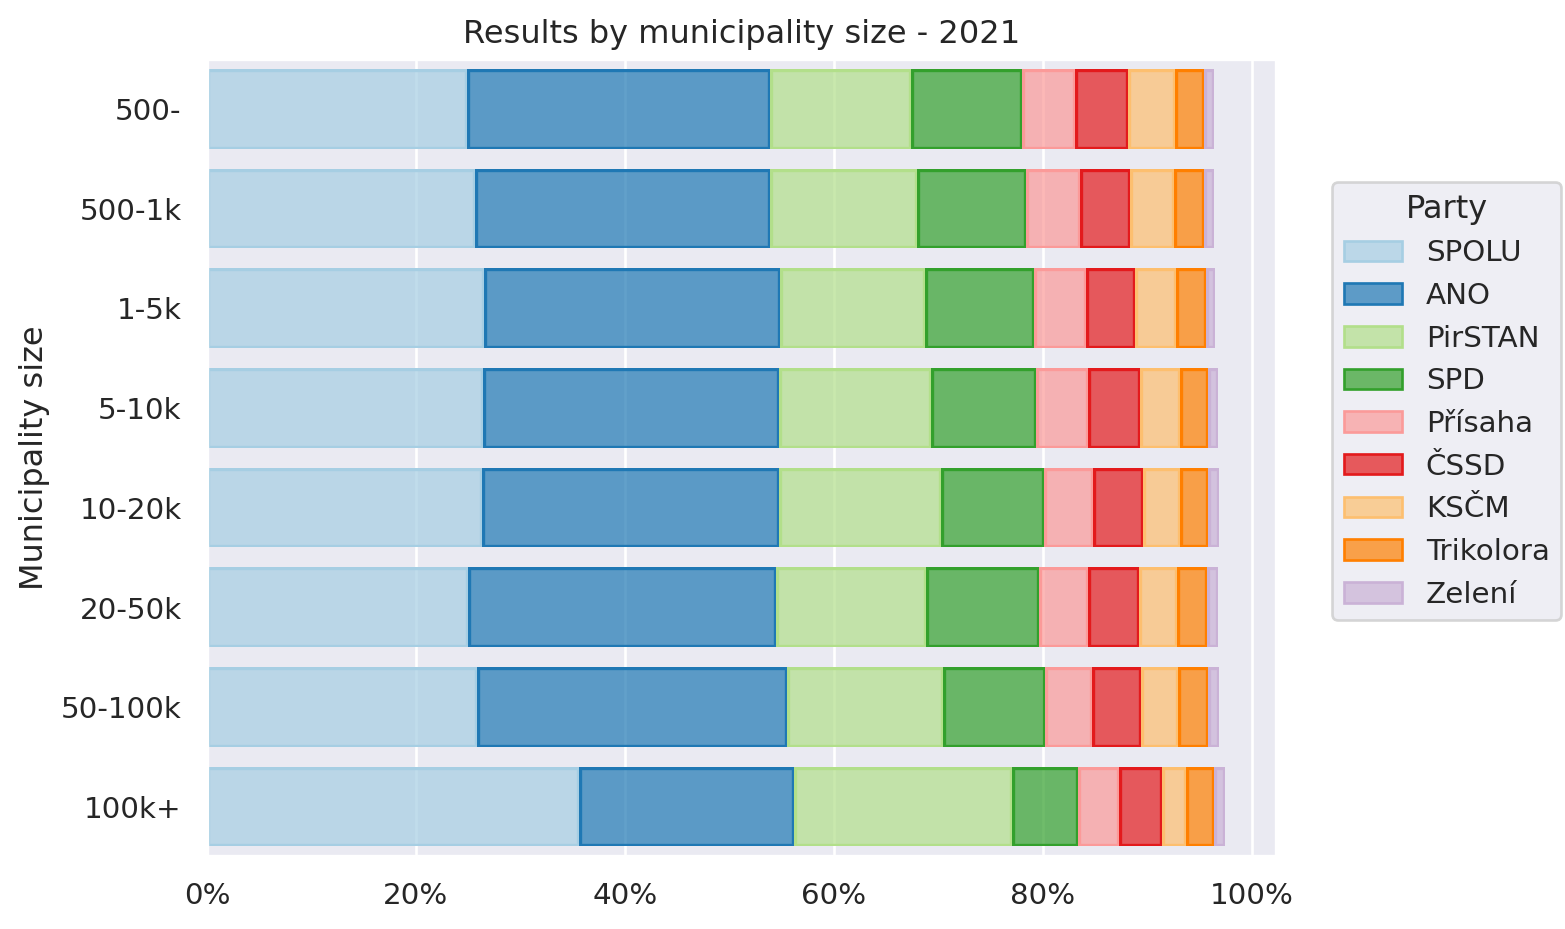

In [47]:
scripts.elections2021_size_plot(elections_extended)

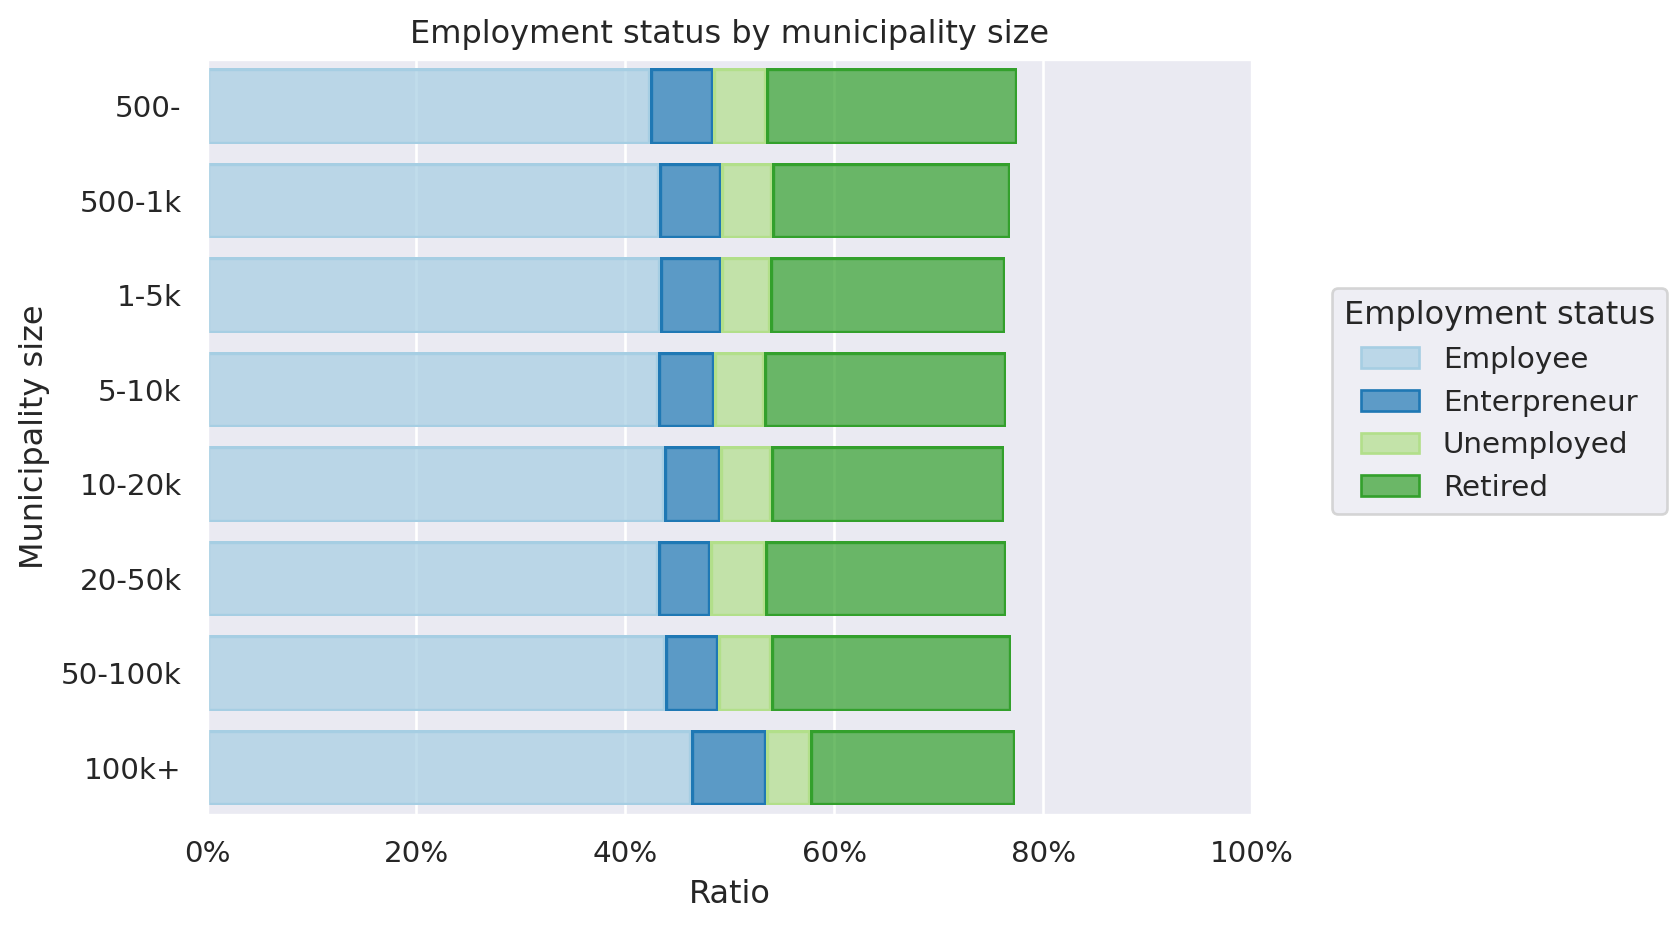

In [48]:
scripts.box_cross_size_plot(elections_extended,"sl11obyvatel",{
        "sl11zam": "Employee",
        "sl11pod": "Enterpreneur",
        "sl11nezam": "Unemployed",
        "sl11neprduch": "Retired",
    }).label(
            x="Ratio",
            y="Municipality size",
            title="Employment status by municipality size",
            color="Employment status",
        ).limit(x=(0,1.0)).theme(scripts.object_theme)

In [49]:


scripts.correlations_2017(elections_extended)

,ANO,ODS,TOP09,SPD,KSČM,ČSSD,KDU,Piráti,STAN,Zelení,Svobodní
Men,0.041093,-0.060295,-0.056719,0.056423,0.077569,-0.056563,0.005917,-0.106459,0.043754,-0.093035,-0.023903
Divorced,0.026135,0.077424,0.163635,0.110595,-0.039317,-0.036474,-0.376418,0.153778,-0.074612,0.169291,0.073551
Children,0.034524,-0.027001,-0.061479,0.093404,-0.022018,-0.086778,0.036371,-0.086571,0.069653,-0.064333,-0.013907
Pensioners,-0.022401,-0.003415,-0.071983,-0.150424,0.081557,0.138584,0.087908,0.008118,-0.022076,-0.005738,-0.052158
Catholic,-0.159647,-0.176227,-0.214413,-0.037560,-0.033460,0.135655,0.772638,-0.173483,-0.091907,-0.121956,-0.076574
Roma,-0.009232,-0.024944,-0.023842,0.000987,0.095163,0.022344,-0.031583,-0.018851,-0.012162,0.013135,-0.003160
University,-0.377577,0.484473,0.449711,-0.316076,-0.405961,-0.128071,-0.001044,0.603053,-0.041547,0.309264,0.188474
Vocational,-0.243306,0.274207,0.312683,-0.205852,-0.236990,-0.070846,-0.026492,0.346914,0.029837,0.164134,0.112741
Extended high school,-0.133087,0.243706,0.216965,-0.168482,-0.231511,-0.024863,-0.047736,0.257751,0.004995,0.153460,0.099864
High school with maturita,-0.185962,0.358873,0.334843,-0.246670,-0.351982,-0.072048,-0.033789,0.341346,0.013866,0.166509,0.152538


In [50]:
scripts.correlations_2017(elections_extended)

,ANO,ODS,TOP09,SPD,KSČM,ČSSD,KDU,Piráti,STAN,Zelení,Svobodní
Men,0.041093,-0.060295,-0.056719,0.056423,0.077569,-0.056563,0.005917,-0.106459,0.043754,-0.093035,-0.023903
Divorced,0.026135,0.077424,0.163635,0.110595,-0.039317,-0.036474,-0.376418,0.153778,-0.074612,0.169291,0.073551
Children,0.034524,-0.027001,-0.061479,0.093404,-0.022018,-0.086778,0.036371,-0.086571,0.069653,-0.064333,-0.013907
Pensioners,-0.022401,-0.003415,-0.071983,-0.150424,0.081557,0.138584,0.087908,0.008118,-0.022076,-0.005738,-0.052158
Catholic,-0.159647,-0.176227,-0.214413,-0.037560,-0.033460,0.135655,0.772638,-0.173483,-0.091907,-0.121956,-0.076574
Roma,-0.009232,-0.024944,-0.023842,0.000987,0.095163,0.022344,-0.031583,-0.018851,-0.012162,0.013135,-0.003160
University,-0.377577,0.484473,0.449711,-0.316076,-0.405961,-0.128071,-0.001044,0.603053,-0.041547,0.309264,0.188474
Vocational,-0.243306,0.274207,0.312683,-0.205852,-0.236990,-0.070846,-0.026492,0.346914,0.029837,0.164134,0.112741
Extended high school,-0.133087,0.243706,0.216965,-0.168482,-0.231511,-0.024863,-0.047736,0.257751,0.004995,0.153460,0.099864
High school with maturita,-0.185962,0.358873,0.334843,-0.246670,-0.351982,-0.072048,-0.033789,0.341346,0.013866,0.166509,0.152538


NameError: name 'xs' is not defined